In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
from plotnine import *
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import matplotlib.pylab as plt
from clean_data import *

In [2]:
df = pd.read_csv("data/loan_level_500k.csv", low_memory=False, index_col=19)
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,WV,SF,26100.0,P,320,2.0,Other sellers,Other servicers,True,False
F199Q1000005,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,OH,SF,45200.0,N,360,1.0,Other sellers,Other servicers,True,False
F199Q1000007,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,OH,SF,44700.0,P,319,1.0,Other sellers,Other servicers,True,False
F199Q1000013,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,AZ,SF,85200.0,N,318,2.0,Other sellers,Other servicers,True,False
F199Q1000015,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,OH,SF,44200.0,N,317,2.0,Other sellers,Other servicers,True,False


In [3]:
df = tidy_data(df)
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,MATURITY_YEAR,MATURITY_MON,FIRST_PAYMENT_YEAR,FIRST_PAYMENT_MON
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,N,NaN,0.0,1.0,O,80.0,33.0,162000,80.0,...,320,2.0,Other sellers,Other servicers,True,0,2029,1,2002,6
F199Q1000005,732.0,N,17140.0,0.0,1.0,O,25.0,10.0,53000,25.0,...,360,1.0,Other sellers,Other servicers,True,0,2029,3,1999,4
F199Q1000007,679.0,N,15940.0,30.0,1.0,O,91.0,48.0,133000,91.0,...,319,1.0,Other sellers,Other servicers,True,0,2029,2,2002,8
F199Q1000013,721.0,N,38060.0,0.0,1.0,O,39.0,13.0,174000,39.0,...,318,2.0,Other sellers,Other servicers,True,0,2029,2,2002,9
F199Q1000015,618.0,N,10420.0,25.0,1.0,O,85.0,24.0,122000,85.0,...,317,2.0,Other sellers,Other servicers,True,0,2029,2,2002,10


In [4]:
#Function from Project 4
def get_roc_data(model, cv_obj):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X[train], y[train])
        scores = model.predict_proba(X[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y[test],scores)
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])
        
        aucs.append(sklearn.metrics.auc(fpr, tpr))
        
    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0
    
    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df

In [5]:
#Logistic Regression Prep
cv_obj = sklearn.model_selection.StratifiedKFold(n_splits=2)

lr = sklearn.linear_model.LogisticRegression(n_jobs = -1)
parameters = {}

lr_cv = sklearn.model_selection.GridSearchCV(lr, parameters, cv=2)

In [6]:
#Using Function from clean_data script to split into testing and training data
train,test, _ = get_train_test_split_for_ml(df, 2000,pre_process=True )

In [7]:
X = train.drop(["DELINQUENT","PREPAID"],axis=1).to_numpy()
y = train["DELINQUENT"]


In [8]:
#Using Function From Project 4
lr_curve_df, lr_auc_df = get_roc_data(lr_cv, cv_obj)

lr_curve_df['model'] = 'logistic regression'
lr_auc_df['model'] = 'logistic regression'

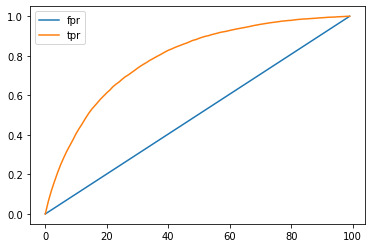

In [10]:
lr_curve_df.plot.line()

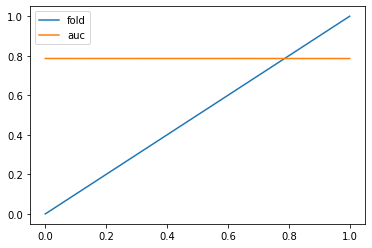

In [11]:
lr_auc_df.plot.line()

In [12]:
lr_curve_df

,fpr,tpr,model
0,0.000000,0.000000,logistic regression
1,0.010101,0.064421,logistic regression
2,0.020202,0.118490,logistic regression
3,0.030303,0.164960,logistic regression
4,0.040404,0.208788,logistic regression
...,...,...,...
95,0.959596,0.997137,logistic regression
96,0.969697,0.997798,logistic regression
97,0.979798,0.998458,logistic regression
98,0.989899,0.999560,logistic regression


In [13]:
lr_auc_df

,fold,auc,model
0,0,0.786339,logistic regression
1,1,0.786090,logistic regression
